# Simulación de procesos estocásticos ARMA, cómputo ACF y PACF

$x_t$

# Simulación IID  

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

(0, 20)

0.5

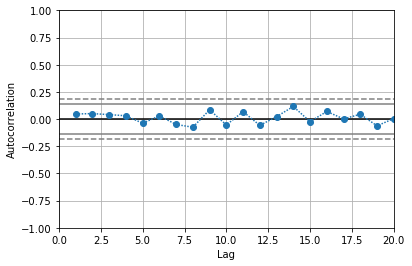

In [2]:

import numpy as np
import pandas as pd
import math 
import matplotlib.pylab as plt
from statsmodels.tsa.arima_process import arma_acf
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels as sm
import statsmodels.api as smapi
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acovf
from statsmodels.tsa.arima_model import ARIMA


n=200 #Tamaño de la serie
l=50 #condiciones iniciales
theta=0.5 
phi=0.5
sigma=2

####Simulación IID####
serieIID=pd.Series(np.random.normal(0, 2, 200))
#plt.plot(serieIID)
#acf(serieIID,nlags=50,unbiased=False)
#plot_acf(serieIID,lags=50,unbiased=False)
from pandas.plotting import autocorrelation_plot
ax=autocorrelation_plot(serieIID,marker="o",dashes= (1,0,0,1))
ax.set_xlim([0, 20])
#plt.show()
plt.savefig('IIDPython.pdf')
theta

# Simulación MA(1)

/Users/sergiocalderon/opt/anaconda3/envs/Ambiente37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.        ,  0.36977764, -0.09520502,  0.02237164,  0.03795367,
       -0.00821252,  0.08157984,  0.08767539, -0.0089273 ,  0.00664295,
        0.1115574 ,  0.10035342,  0.05181097, -0.0104788 , -0.09052683,
       -0.11615462, -0.10849518, -0.06674178, -0.06589235, -0.12979796,
       -0.08404642, -0.04553956, -0.10834959, -0.13036313, -0.03222172,
        0.03303749, -0.05723036, -0.07378789,  0.03160149, -0.02419449,
       -0.00740707,  0.00793227, -0.10548643, -0.1275068 ,  0.01366888,
        0.07356402, -0.01531031,  0.04857406,  0.10586589,  0.06707367,
        0.05520348, -0.01155665, -0.141862  , -0.1398459 , -0.07229695,
       -0.02327081, -0.02867139,  0.03284925,  0.05928699, -0.00364435,
        0.00132601])

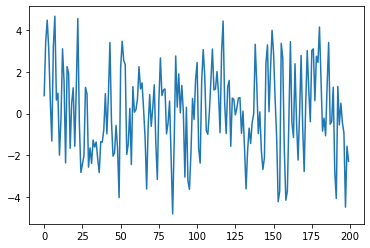

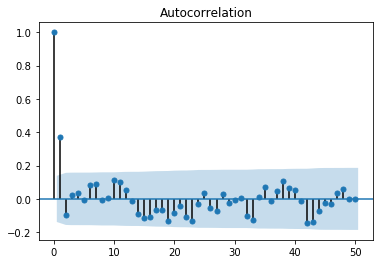

In [3]:
#####Simulación MA(1)#####
ruido=np.random.normal(0, sigma, n+l)
MA1aux=np.zeros(n+l)
for t in range(1,n+l):
    MA1aux[t]=theta*ruido[t-1]+ruido[t]


MA1=pd.Series(MA1aux[(l-1):(n+l-1)])
plt.plot(MA1)

acf(MA1,nlags=50,unbiased=False)

x=plot_acf(MA1,lags=50,unbiased=False, alpha=0.05)

#    # Definición de una nueva función

# Simulación ARMA

/Users/sergiocalderon/opt/anaconda3/envs/Ambiente37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.        ,  0.49234155,  0.26546148,  0.24868844,  0.05428877,
        0.11790088,  0.03088673, -0.1140841 , -0.06344877, -0.07470163,
       -0.03284976, -0.02175605, -0.0094192 , -0.00945496,  0.02567791,
       -0.06862677, -0.10632925, -0.06589296, -0.0804648 , -0.02374443,
        0.025295  , -0.01043217, -0.12161189, -0.16327466, -0.11374323,
       -0.16290367, -0.12491133, -0.05695864, -0.12043798, -0.09444367,
       -0.04082355, -0.04088603, -0.10110115, -0.13639095, -0.10785793,
       -0.04020291, -0.01642865,  0.06281423,  0.06890765,  0.05498375,
        0.12718555,  0.13713571,  0.05010229,  0.02125286, -0.02041669,
       -0.0401539 , -0.01328464,  0.03247933,  0.06530489,  0.09353878,
        0.1117868 ])

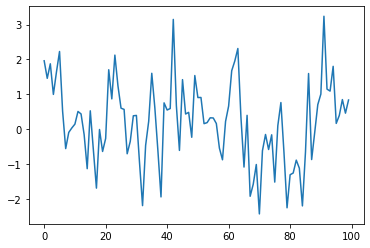

In [4]:
ar=np.array([1,-0.5]) ####Coeficientes del polinomio autoregresivo.
ma=np.array([1])

np.random.seed(186)
Tlength=100
sigma=1###Varianza de ruido
simul = sm.tsa.arima_process.arma_generate_sample(ar=ar,ma=ma,nsample=Tlength,scale=sigma,distrvs = np.random.normal) 


plt.plot(simul)
acf(simul,nlags=50,unbiased=False)
#plot_acf(simul,lags=50,unbiased=False)




# ACF Teórico

In [5]:
teor = arma_acf(ar,ma,20)
print(teor)
#### Con función ArmaProcess
ARMA=ArmaProcess(ar,ma)
ARMA.acf(5)

[1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
 6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03
 3.90625000e-03 1.95312500e-03 9.76562500e-04 4.88281250e-04
 2.44140625e-04 1.22070312e-04 6.10351562e-05 3.05175781e-05
 1.52587891e-05 7.62939453e-06 3.81469727e-06 1.90734863e-06]


array([1.    , 0.5   , 0.25  , 0.125 , 0.0625])

array([ 1.        ,  0.49234155,  0.26546148,  0.24868844,  0.05428877,
        0.11790088,  0.03088673, -0.1140841 , -0.06344877, -0.07470163,
       -0.03284976, -0.02175605, -0.0094192 , -0.00945496,  0.02567791,
       -0.06862677, -0.10632925, -0.06589296, -0.0804648 , -0.02374443,
        0.025295  , -0.01043217, -0.12161189, -0.16327466, -0.11374323,
       -0.16290367, -0.12491133, -0.05695864, -0.12043798, -0.09444367,
       -0.04082355, -0.04088603, -0.10110115, -0.13639095, -0.10785793,
       -0.04020291, -0.01642865,  0.06281423,  0.06890765,  0.05498375,
        0.12718555,  0.13713571,  0.05010229,  0.02125286, -0.02041669,
       -0.0401539 , -0.01328464,  0.03247933,  0.06530489,  0.09353878,
        0.1117868 ])

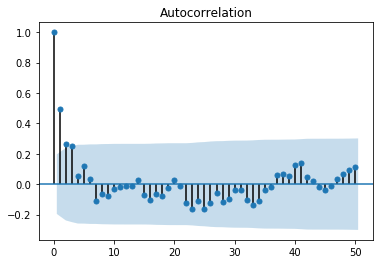

In [6]:
acf(simul,nlags=50,unbiased=False)
acfsimul=plot_acf(simul,lags=50,unbiased=False)




(0, 20)

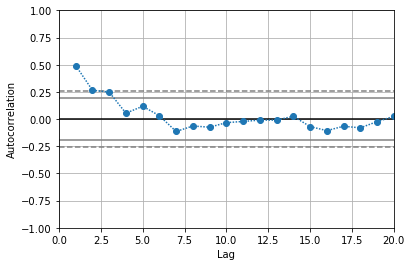

In [7]:

ax =autocorrelation_plot(simul,marker="o",dashes= (1,0,0,1))
ax.set_xlim([0, 20])

In [8]:
phi
theta
n
sigma
l

0.5

0.5

200

1

50